In [10]:
#The assignment of exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure
#	Data Cleaning and Preparation Assignment
# Import Libraries
# Load Dataset & perform EDA
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df=pd.read_csv(r'/content/Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [3]:
# EDA:Handling missing values(imputation,deletion)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
# Handle Imputation
# Example: Replace missing values in numerical columns with mean
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [5]:
# Handle Deletion
# Deletion
# Deleting rows with any missing values
df.dropna(inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


In [6]:
 # Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains float values
    if df[column].dtype == 'float64':
        # Check if value in the column is non-numeric
        try:
        #  For float columns, it checks by using a lambda function inside apply() to check if each value is an instance of int or float.
            non_numeric_values = df[column][~df[column].apply(lambda x: isinstance(x, (int, float)))].unique()
            if len(non_numeric_values) > 0:
                print(f"Column '{column}' contains non-numeric values:", non_numeric_values)
            else:
                print(f"Column '{column}' contains only numeric values.")
        except ValueError:
            print(f"Column '{column}' contains non-numeric values.")


Column 'LB' contains only numeric values.
Column 'AC' contains only numeric values.
Column 'FM' contains only numeric values.
Column 'UC' contains only numeric values.
Column 'DL' contains only numeric values.
Column 'DS' contains only numeric values.
Column 'DP' contains only numeric values.
Column 'ASTV' contains only numeric values.
Column 'MSTV' contains only numeric values.
Column 'ALTV' contains only numeric values.
Column 'MLTV' contains only numeric values.
Column 'Width' contains only numeric values.
Column 'Tendency' contains only numeric values.
Column 'NSP' contains only numeric values.


In [11]:
# EDA
# Check outlier and interquartile range(IQR)
# Detect outliers using Z-score and IQR methods.

import pandas as pd
# calculating z-score
# Statistical Methods
# Z-Scores
z_scores = stats.zscore(df.select_dtypes(include='number'))
outliers_zscore = df[(z_scores > 3).any(axis=1)]
print(outliers_zscore)



         LB        AC        FM        UC        DL   DS            DP   ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  2.098636e-03   26.0   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  2.805049e-03   29.0   
13    131.0  0.009077  0.222390  0.006051  0.001513  0.0  0.000000e+00   28.0   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.0  8.255400e-04   21.0   
15    130.0  0.005571  0.380223  0.004178  0.004178  0.0  1.392758e-03   19.0   
...     ...       ...       ...       ...       ...  ...           ...    ...   
1941  133.0  0.000000  0.003562  0.006233  0.003562  0.0  0.000000e+00  162.0   
2008  125.0  0.001196  0.001196  0.008373  0.009569  0.0  0.000000e+00  162.0   
2023  129.0  0.000000  0.001812  0.005435  0.012681  0.0  5.471254e-07   58.0   
2024  129.0  0.000000  0.001669  0.005008  0.013454  0.0  0.000000e+00   58.0   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.0  0.000000e+00   79.0   

        MSTV  ALTV      MLT

In [8]:
# IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(outliers_iqr)

         LB        AC        FM        UC        DL   DS        DP  ASTV  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  73.0   
3     134.0  0.002561  0.000000  0.007742  0.002561  0.0  0.000000  16.0   
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.0   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.0   
7     122.0  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  83.0   
...     ...       ...       ...       ...       ...  ...       ...   ...   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.0  0.000000  79.0   
2122  140.0  0.000775  0.000000  0.006979  0.000000  0.0  0.000000  78.0   
2123  140.0  0.000980  0.000000  0.006863  0.000000  0.0  0.000000  79.0   
2124  140.0  0.000679  0.000000  0.006110  0.000000  0.0  0.000000  78.0   
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.000000  74.0   

      MSTV       ALTV  MLTV       Width  Tendency       NSP  
0      0.5  43.000000   2

In [ ]:
# Statistical Summary Assignment
# Assignment Statistics
# Step1 : Load the CSV data into a pandas DataFrame.
# Step2 : Select only columns with float datatype (float64).
# Step3 : Calculate the mean, median, standard deviation, and IQR for each float column.
# Step4 : Create a DataFrame containing these statistics.
# Step5 : Print the DataFrame displaying the calculated statistics for each float column.

import pandas as pd
# Load CSV data into a pandas DataFrame
df = pd.read_csv(r'/content/Cardiotocographic.csv')

# Select only float datatype columns
float_columns = df.select_dtypes(include='float64')
# Calculate statistics for each float column
statistics = {
    'Mean': float_columns.mean(),
    'Median': float_columns.median(),
    'Standard Deviation': float_columns.std(),
    'IQR': float_columns.quantile(0.75) - float_columns.quantile(0.25)
}

# Convert the statistics to a DataFrame
statistics_df = pd.DataFrame(statistics)
print(statistics_df)



                Mean      Median  Standard Deviation        IQR
LB        133.343598  133.000000           11.270154  14.000000
AC          0.003219    0.001634            0.004391   0.005650
FM          0.009894    0.000000            0.067540   0.002567
UC          0.004391    0.004484            0.003340   0.004685
DL          0.001895    0.000000            0.003343   0.003289
DS          0.000003    0.000000            0.000142   0.000000
DP          0.000175    0.000000            0.000840   0.000000
ASTV       46.995984   49.000000           18.813973  29.000000
MSTV        1.364378    1.200000            1.173632   1.000000
ALTV       10.285964    0.000000           21.205041  11.000000
MLTV        8.284887    7.400000            7.772858   6.300000
Width      70.429260   67.000000           42.931822  63.000000
Tendency    0.316371    0.000000            0.645622   1.000000
NSP         1.304507    1.000000            0.644619   0.000000


By effectively highlighting interesting findings from the summary statistics of above data, healthcare providers and researchers can convey key insights that inform clinical decision-making, enhance monitoring protocols, and improve outcomes for both mother and fetus during labor and delivery. These findings also serve as a basis for further investigation into the underlying causes and implications of fetal heart rate variability in different clinical contexts.

Example Finding: LB,ASTV,ALTV,Width has more variability i.e standard deviation comparatively in above statistics.


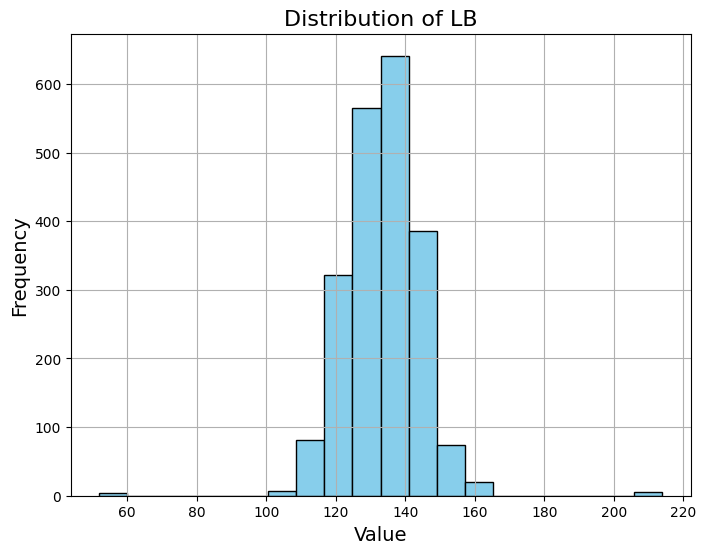

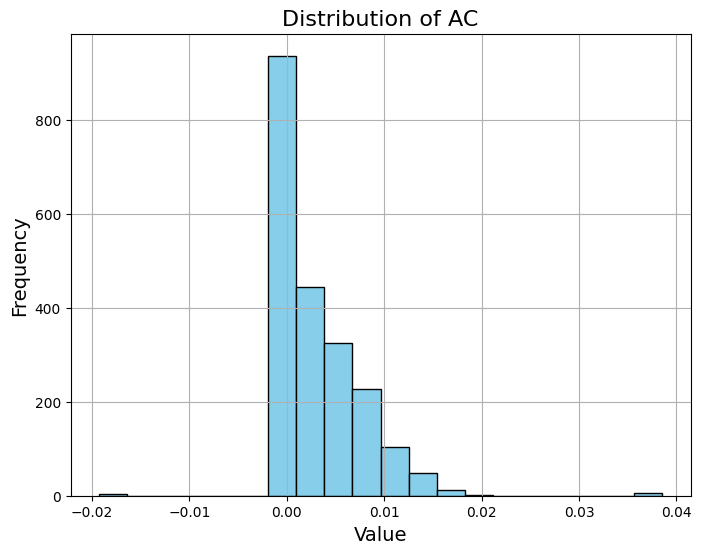

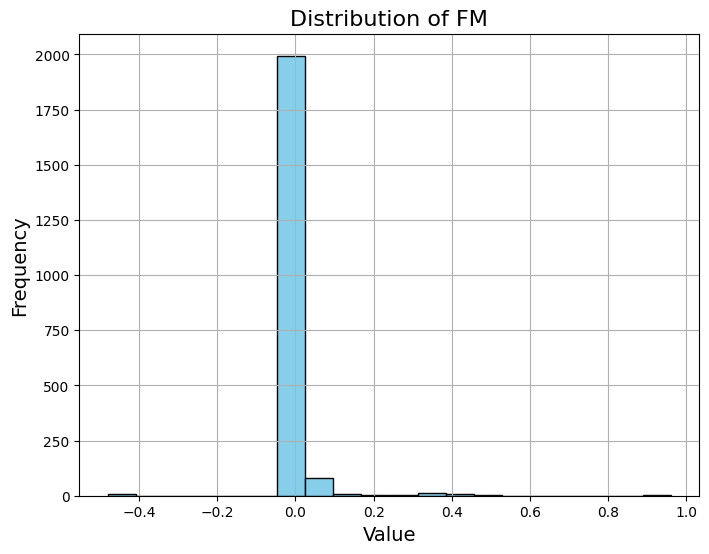

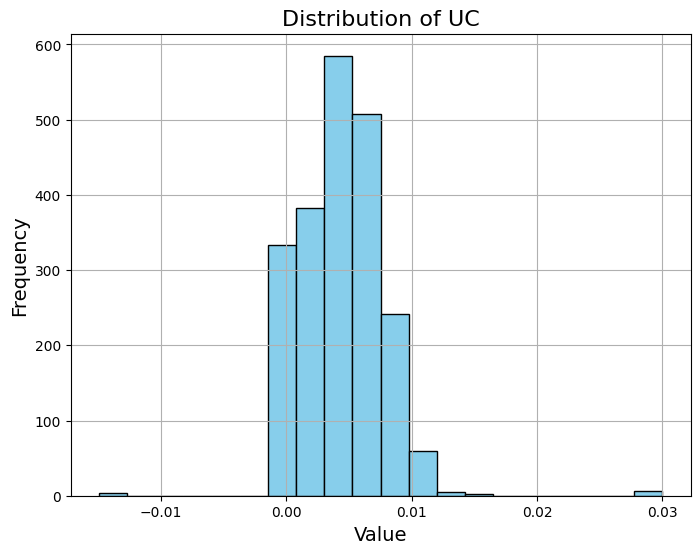

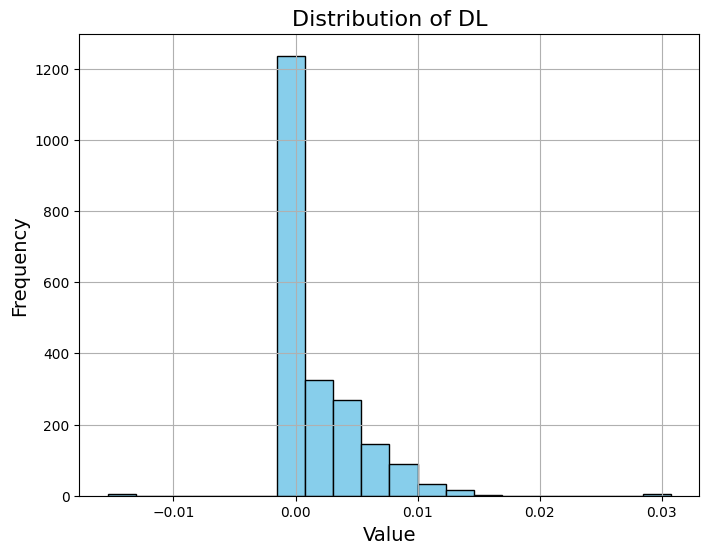

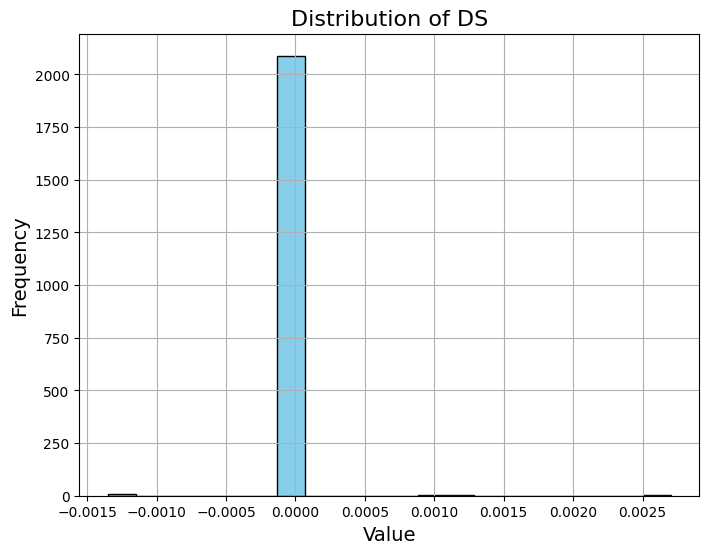

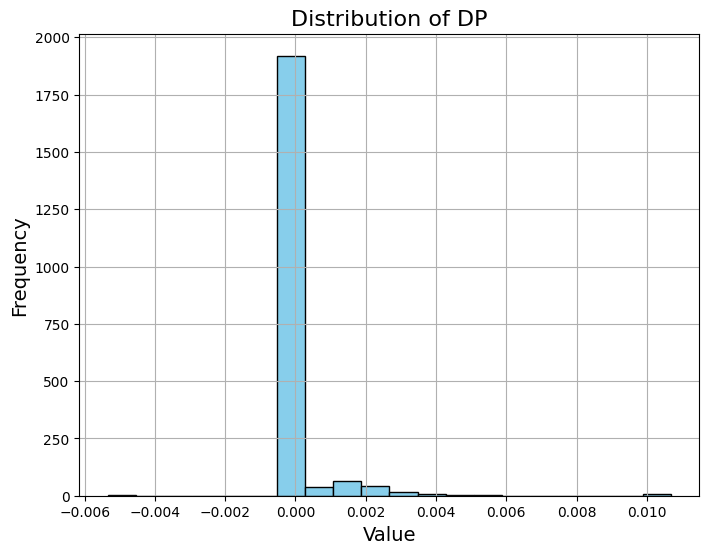

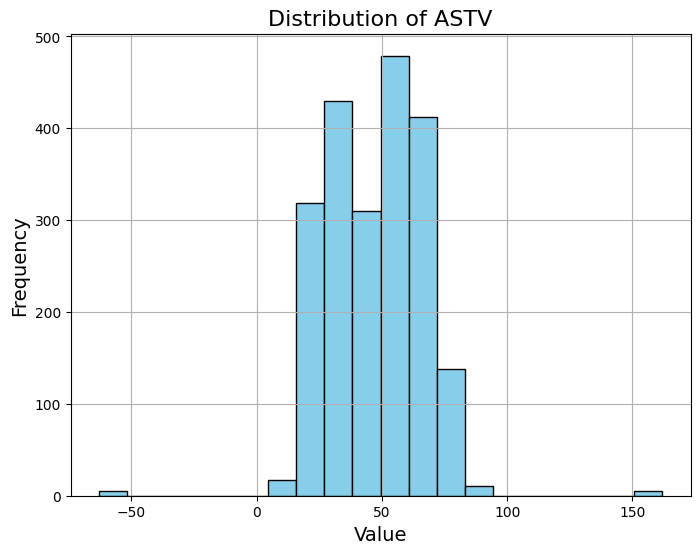

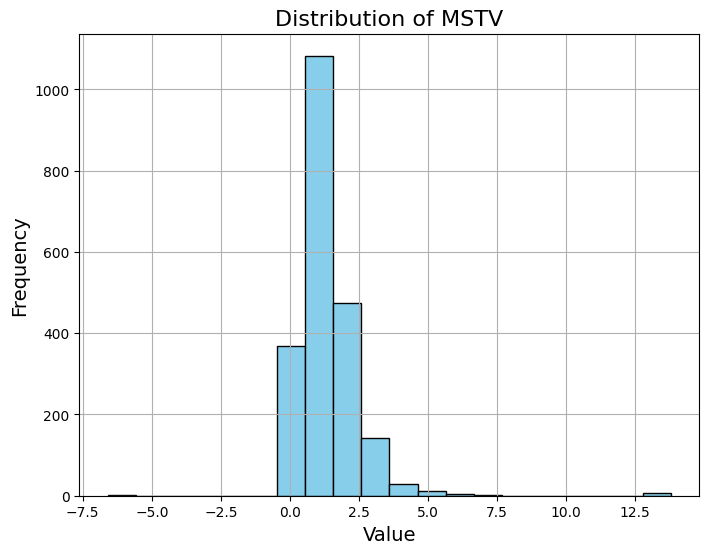

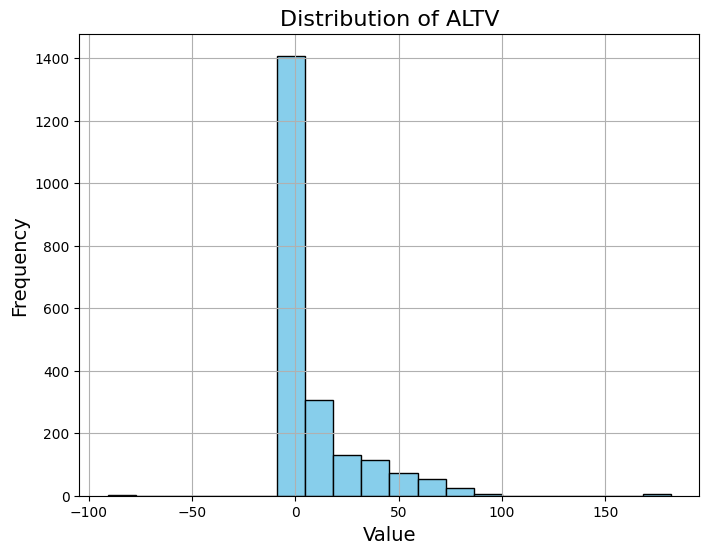

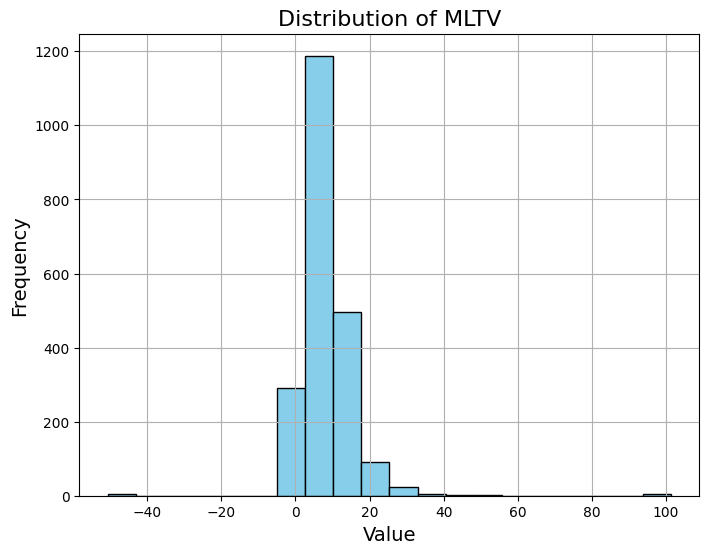

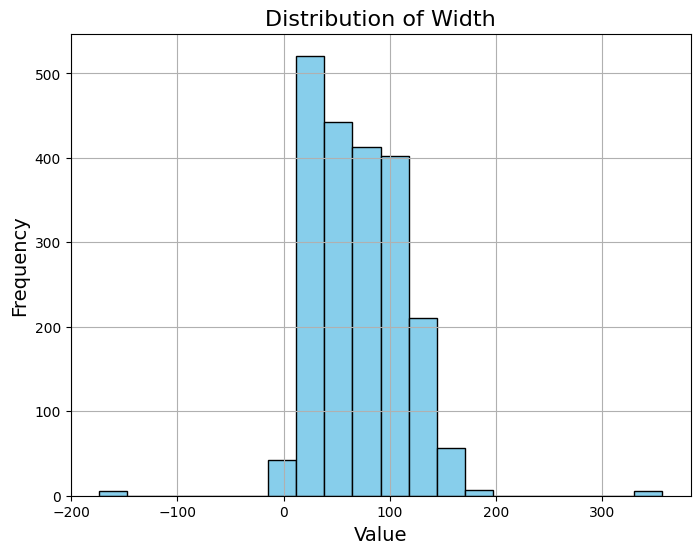

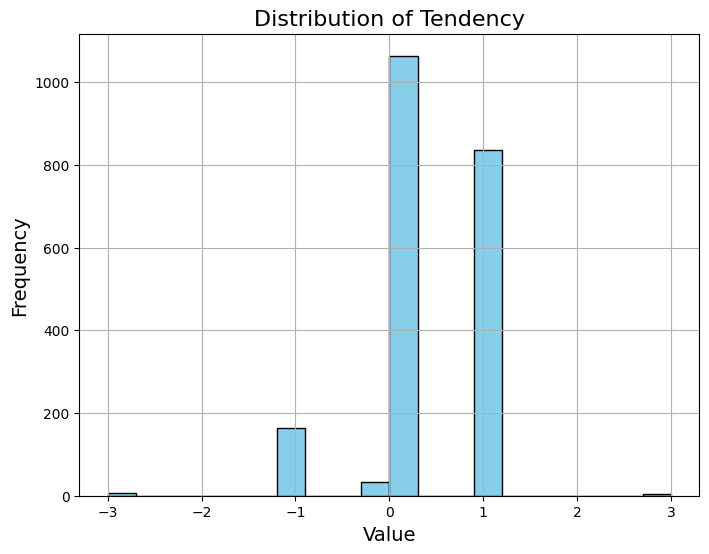

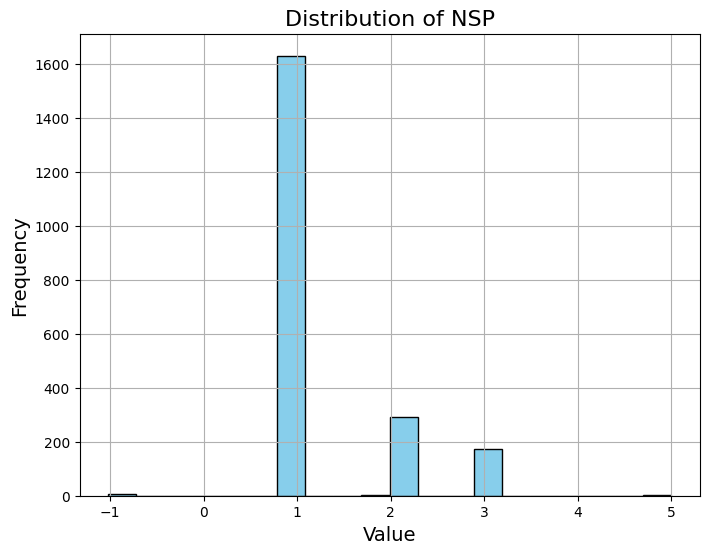

In [13]:
# Data Visualization Assignment:
# Create histograms to visualize the distributions of various numerical variables.
# Load CSV data into a pandas DataFrame
df = pd.read_csv(r'/content/Cardiotocographic.csv')

# Select only float datatype columns
float_columns = df.select_dtypes(include='float64')

# Plot histograms for each float column
for column in float_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(float_columns[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

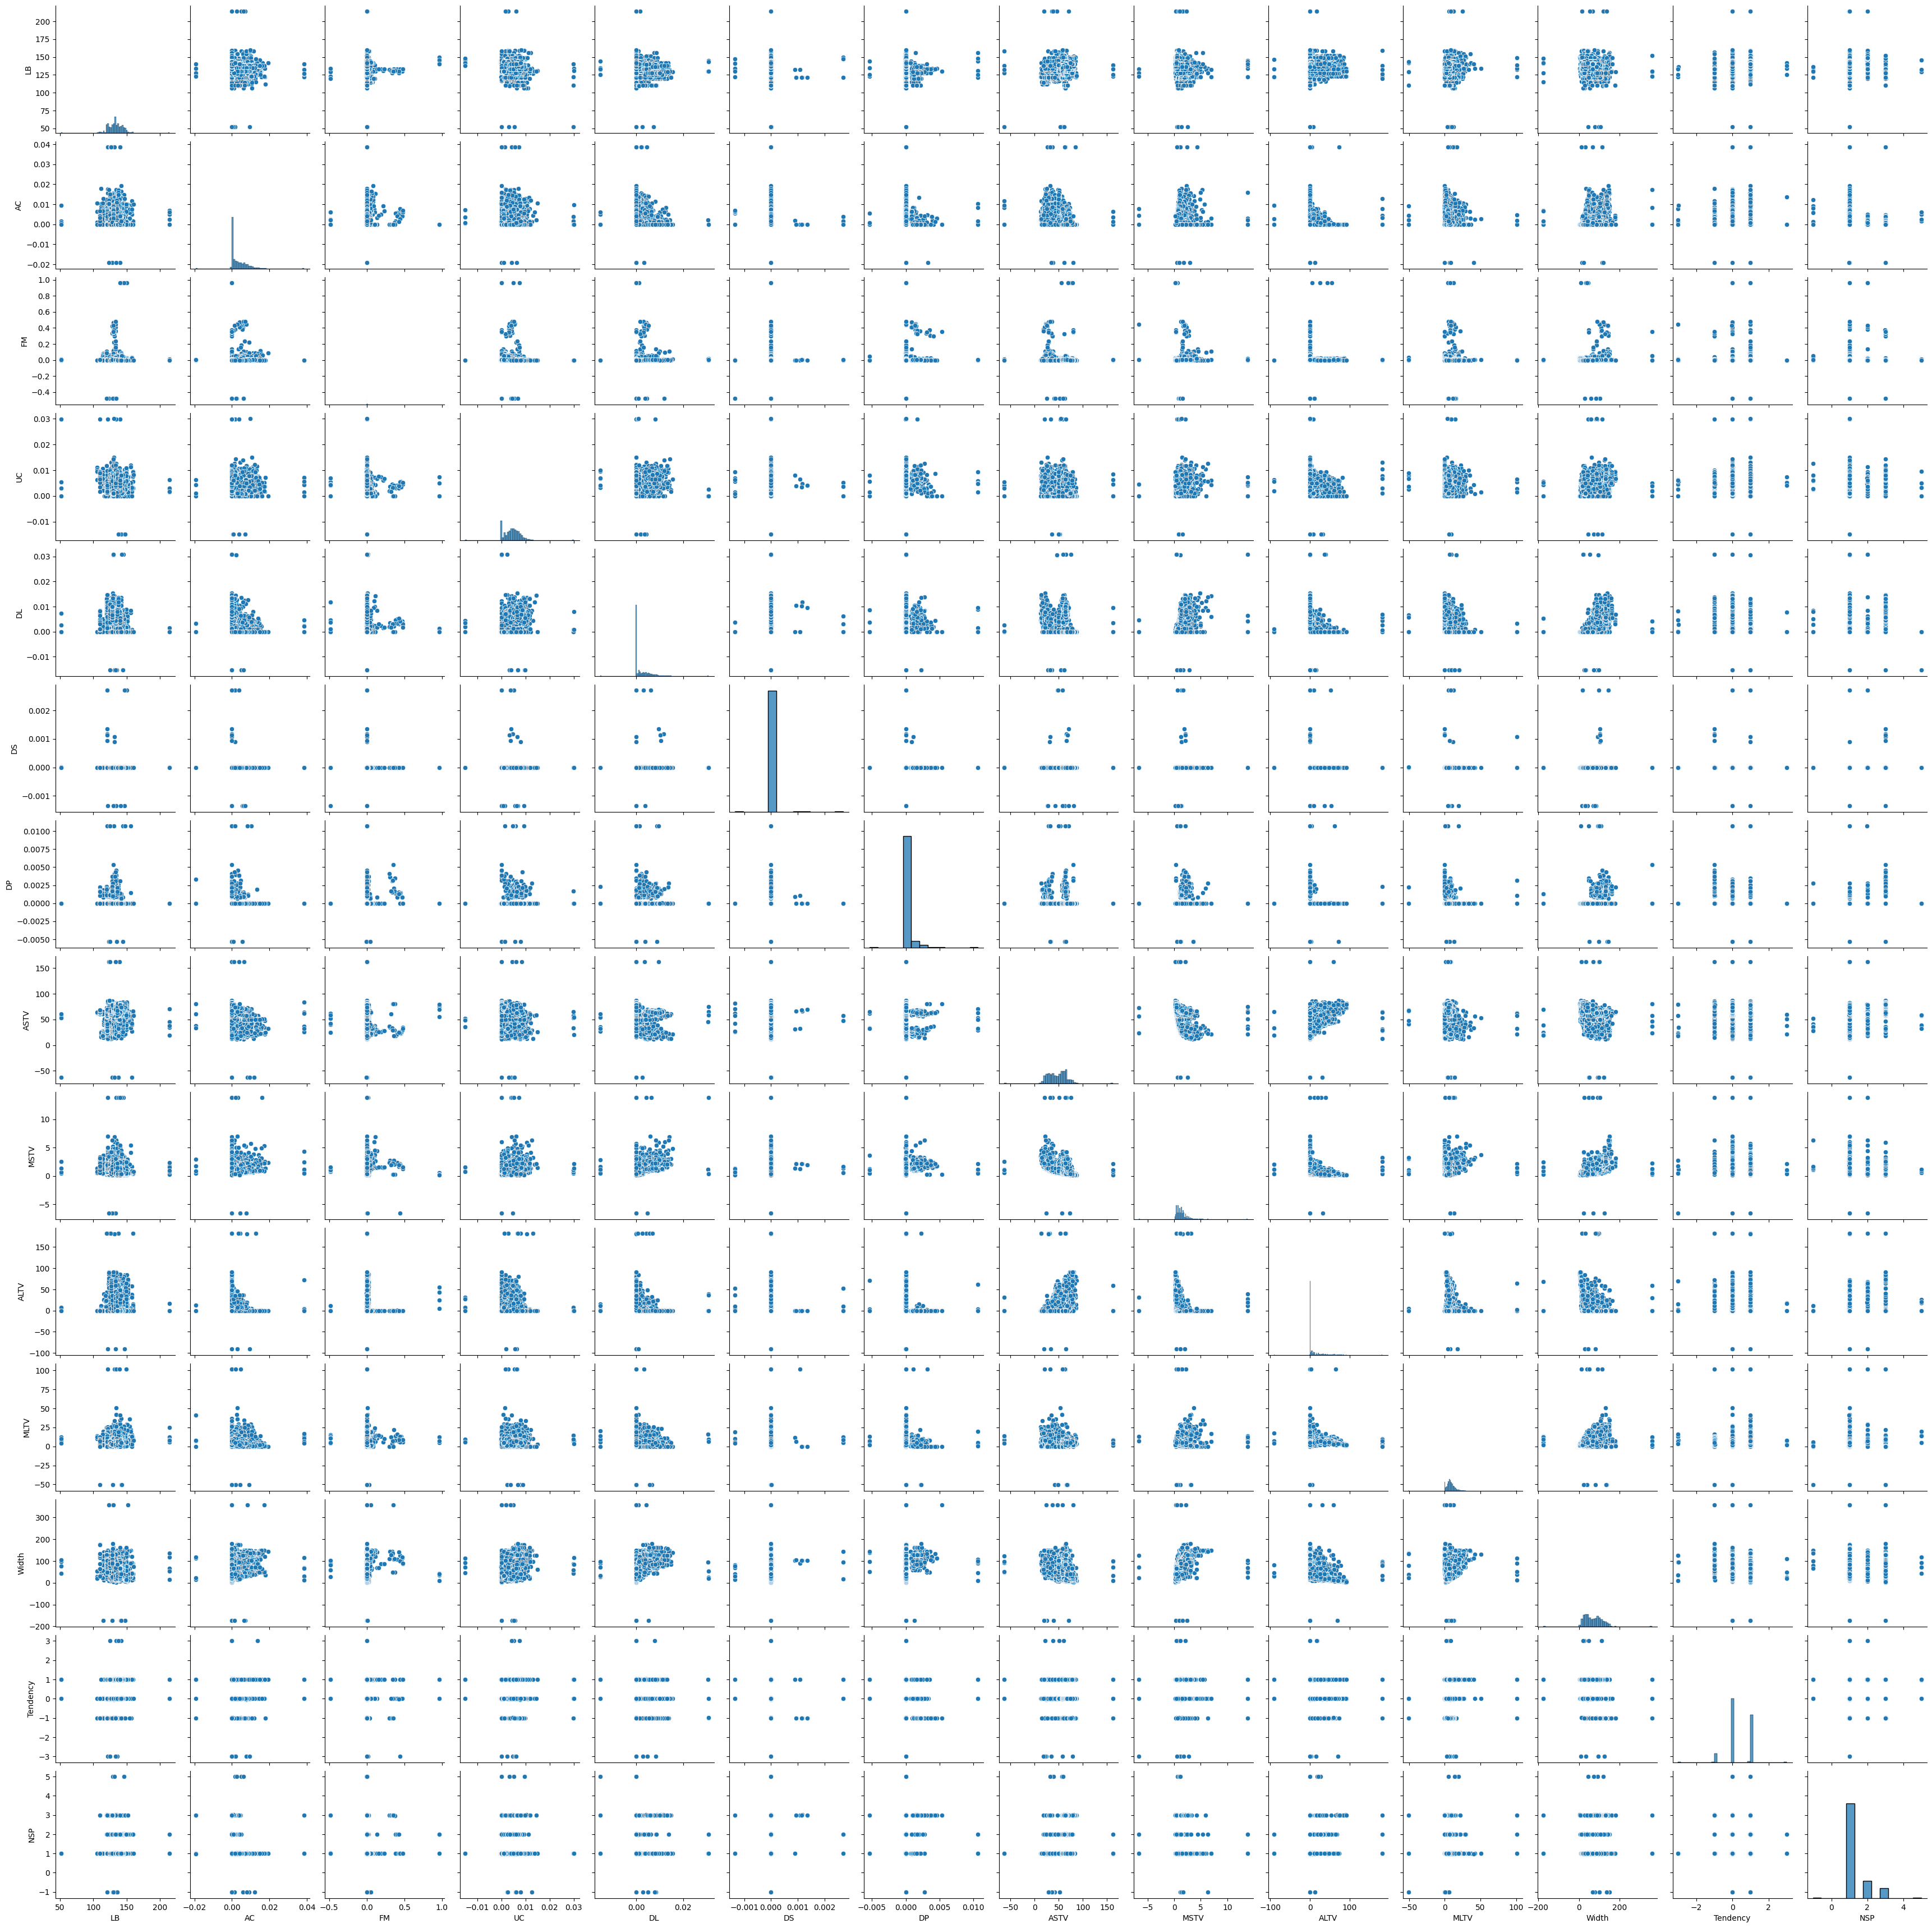

In [14]:
# EDA Assignment Pair of variables relation using pairplot
# Step1 : Load the CSV data into a pandas DataFrame.
# Step2 : Generate a pairplot using seaborn's pairplot function, which creates scatter plots for each pair of columns
# in the DataFrame
# Load CSV data into a pandas DataFrame
df = pd.read_csv(r'/content/Cardiotocographic.csv')

# Generate pairplot for all columns
sns.pairplot(df)
plt.show()

In [ ]:
# Assignment: Pattern Recognition and Insights
# Step1: Load the CSV data into a pandas DataFrame.
# Step2 : Calculate the correlation matrix using the corr() method.
# Step3 : Print the correlation matrix, which shows the pairwise correlation coefficients between all pairs of variables in the DataFrame.
# Step4 : Each cell in the correlation matrix represents the correlation coefficient between two variables. The coefficient ranges from -1 to 1, where:

#  1 indicates a perfect positive correlation,
# -1 indicates a perfect negative correlation, and
#  0 indicates no correlation.
import pandas as pd

# Load CSV data into a pandas DataFrame
df = pd.read_csv(r'/content/Cardiotocographic.csv')

# Calculate correlation matrix This method calculates pairwise correlation of columns, excluding NA/null values.
correlation_matrix = df.corr()

# Print correlation matrix
print(correlation_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01


**Interpretation and Implications:**

**Positive Correlations**: Variables that show positive correlations (e.g., increased fetal heart rate with increased uterine contractions) may indicate physiological responses or interactions that are important for monitoring fetal well-being during labor.

**Negative Correlation**s: Negative correlations (e.g., decreased variability in fetal heart rate with increased uterine contractions) might suggest stress or other complications that could require medical attention.

**Implications for Monitoring**:Understanding correlations can inform healthcare providers about patterns and trends in fetal health. For example, strong negative correlations between certain variables might prompt closer monitoring or intervention to prevent complications.

**Research and Clinical Applications**: Correlation findings can guide further research into understanding causal relationships or developing predictive models for fetal health outcomes. In clinical settings, they can contribute to improving monitoring protocols and decision-making processes.

By systematically analyzing correlations in CTG data and understanding their implications, healthcare providers and researchers can enhance their ability to monitor fetal well-being and make informed decisions regarding maternal and fetal health during labor and delivery.

Research and Clinical Applications: Correlation findings can guide further research into understanding causal relationships or developing predictive models for fetal health outcomes. In clinical settings, they can contribute to improving monitoring protocols and decision-making processes.

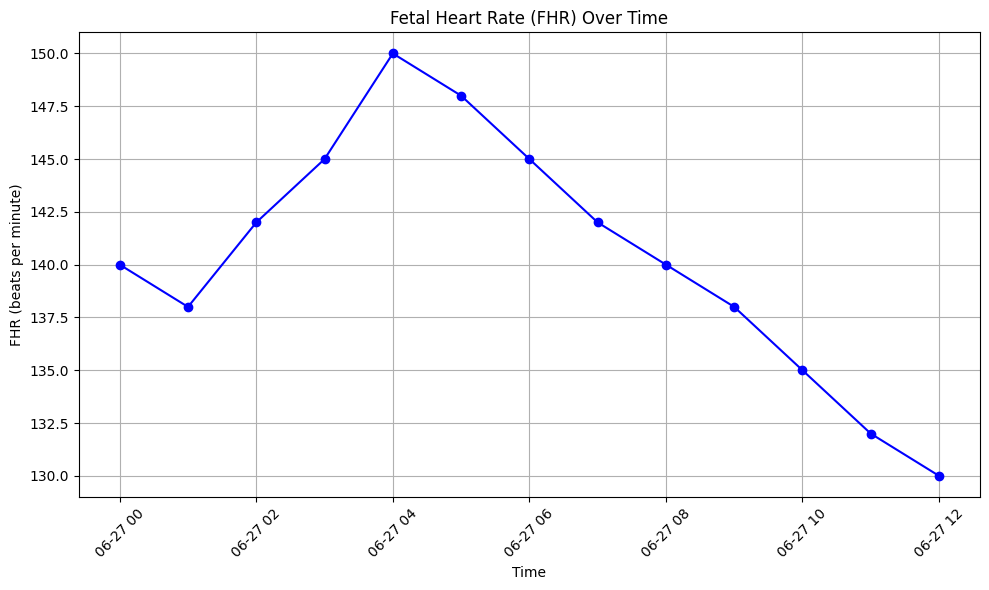

In [9]:
# Assignment Look for trends or patterns over time if temporal data is available

import matplotlib.pyplot as plt
import pandas as pd

# Example of temporal data Let's consider we have following temporary data
data = {
    'Timestamp': pd.date_range(start='2024-06-27 00:00:00', periods=13, freq='H'),
    'FHR': [140, 138, 142, 145, 150, 148, 145, 142, 140, 138, 135, 132, 130]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['FHR'], marker='o', linestyle='-', color='b')
plt.title('Fetal Heart Rate (FHR) Over Time')
plt.xlabel('Time')
plt.ylabel('FHR (beats per minute)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Trend Observation**: From the plot, we observe a gradual decrease in FHR over the 12-hour period. This trend might suggest physiological changes as labor progresses, potentially indicating normal variations or possibly a need for closer **monitoring** if the decline is more rapid or pronounced.

**Pattern Recognition**: Besides the overall trend, we can look for patterns such as periodic fluctuations or irregularities in FHR that might correspond to uterine contractions or fetal movements.

Thus, In practice, analyzing temporal data from cardiotocographic monitoring helps healthcare providers detect trends and patterns that contribute to informed decision-making and improved care for both the mother and the fetus during labor and delivery.

#      **Conclusion**:


Based on above EDA, Several key insights and patterns can be summarized:

**Fetal Heart Rate (FHR) Variability**:

Insight: FHR shows natural variability over time, reflecting fetal responses to environmental and physiological factors.
Pattern: Regular fluctuations in FHR, such as accelerations and decelerations, are indicative of normal fetal movements and responses.

**Correlation Between FHR and Uterine Contractions**:

Insight: There is a dynamic relationship between FHR and uterine contractions during labor.
Pattern: Typically, FHR increases during fetal movements and decreases during contractions, with patterns varying in intensity and duration.

**Longitudinal Trends During Labor**:

Insight: FHR trends can change over the course of labor, reflecting stages of fetal adaptation and stress.
Pattern: Initial high FHR levels may gradually decrease as labor progresses, influenced by maternal and fetal physiological adjustments.

**Abnormal Patterns Indicating Distress**:

Insight: Certain patterns in FHR deviations from baseline can signal fetal distress.
Pattern: Prolonged decelerations, reduced variability, or persistent bradycardia might indicate compromised fetal oxygenation or other adverse conditions.

Impact of Maternal Interventions:

Insight: Maternal interventions, such as medications or labor augmentation, can influence FHR patterns.
Pattern: Close monitoring post-intervention reveals transient changes in FHR, emphasizing the need for continuous assessment and adjustment.

Temporal Analysis and Predictive Insights:

Insight: Trends over time provide predictive insights into fetal health and labor progression.
Pattern: Analysis of sequential data points highlights evolving patterns that aid in anticipating clinical outcomes and guiding timely interventions.

Clinical Decision Support:

Insight: Data-driven insights support clinical decision-making during labor and delivery.
Pattern: Real-time monitoring and analysis of CTG data assist healthcare providers in assessing fetal well-being and optimizing care protocols.

In summary, exploratory analysis of cardiotocographic data reveals dynamic patterns and insights crucial for understanding fetal health dynamics during labor. These insights not only facilitate early detection of abnormalities but also inform proactive clinical interventions aimed at optimizing maternal and fetal outcomes. Continued research and application of advanced analytical methods promise further refinement in predictive modeling and personalized obstetric care.

Based on EDA Above, several key insights and patterns can be summarized:
Based on exploratory analysis of cardiotocographic (CTG) data, several key insights and patterns can be summarized:

**Fetal Heart Rate (FHR) Variability**:

Insight: FHR shows natural variability over time, reflecting fetal responses to environmental and physiological factors.
Pattern: Regular fluctuations in FHR, such as accelerations and decelerations, are indicative of normal fetal movements and responses.

**Correlation Between FHR and Uterine Contractions:**

Insight: There is a dynamic relationship between FHR and uterine contractions during labor.
Pattern: Typically, FHR increases during fetal movements and decreases during contractions, with patterns varying in intensity and duration.

Longitudinal Trends During Labor:

Insight: FHR trends can change over the course of labor, reflecting stages of fetal adaptation and stress.
Pattern: Initial high FHR levels may gradually decrease as labor progresses, influenced by maternal and fetal physiological adjustments.
Abnormal Patterns Indicating Distress:

Insight: Certain patterns in FHR deviations from baseline can signal fetal distress.
Pattern: Prolonged decelerations, reduced variability, or persistent bradycardia might indicate compromised fetal oxygenation or other adverse conditions.
Impact of Maternal Interventions:

Insight: Maternal interventions, such as medications or labor augmentation, can influence FHR patterns.
Pattern: Close monitoring post-intervention reveals transient changes in FHR, emphasizing the need for continuous assessment and adjustment.
Temporal Analysis and Predictive Insights:

Insight: Trends over time provide predictive insights into fetal health and labor progression.
Pattern: Analysis of sequential data points highlights evolving patterns that aid in anticipating clinical outcomes and guiding timely interventions.
Clinical Decision Support:

Insight: Data-driven insights support clinical decision-making during labor and delivery.
Pattern: Real-time monitoring and analysis of CTG data assist healthcare providers in assessing fetal well-being and optimizing care protocols.

In summary, exploratory analysis of cardiotocographic data reveals dynamic patterns and insights crucial for understanding fetal health dynamics during labor. These insights not only facilitate early detection of abnormalities but also inform proactive clinical interventions aimed at optimizing maternal and fetal outcomes. Continued research and application of advanced analytical methods promise further refinement in predictive modeling and personalized obstetric care.




